In [1]:
import matplotlib.pyplot as plt

In [2]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 8390083084996258872
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 3660972032
locality {
  bus_id: 1
  links {
  }
}
incarnation: 8848310926764277870
physical_device_desc: "device: 0, name: NVIDIA GeForce RTX 3060 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.6"
]


In [3]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.layers import Input

In [3]:
Initial_Model = VGG16(weights='imagenet',include_top=False,input_tensor=Input(shape=(224,224,3)))
for layer in Initial_Model.layers:
    layer.trainable = False

Initial_Model.summary()
x = Initial_Model.output
x = layers.Flatten()(x)
#x = layers.Dense(512, activation='relu')(x)
x = layers.Dense(512, activation='relu')(x)
x = layers.Dropout(0.2)(x)
x = layers. Dense (2, activation='softmax')(x)

model = Model(Initial_Model.input, x)
model.compile(optimizer = RMSprop(learning_rate = 5e-6), loss='binary_crossentropy', metrics = ['accuracy'])
model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [4]:
TRAINING_DIR = 'C:/Users/M Cendekia Airlangga/Dataset/02_Dataset baru/train'
train_datagen = ImageDataGenerator(
    rescale=1./255.,
    fill_mode='nearest')

train_generator = train_datagen.flow_from_directory(
    TRAINING_DIR,
    batch_size=64,
    class_mode='categorical',
    target_size=(224, 224)
)

VALIDATION_DIR = 'C:/Users/M Cendekia Airlangga/Dataset/02_Dataset baru/validation'
validation_datagen = ImageDataGenerator(rescale= 1./255.)
validation_generator = validation_datagen.flow_from_directory(
    VALIDATION_DIR,
    batch_size=64,
    class_mode='categorical',
    target_size=(224, 224)
)

Found 1698 images belonging to 2 classes.
Found 566 images belonging to 2 classes.


In [5]:
ACCURACY_THRESHOLD = 0.95

class myCallback(tf.keras.callbacks.Callback): 
    def on_epoch_end(self, epoch, logs={}): 
        if(logs.get('accuracy') > ACCURACY_THRESHOLD):   
            print("\nReached %2.2f%% accuracy, so stopping training!!" %(ACCURACY_THRESHOLD*100))   
            self.model.stop_training = True
        
callbacks = myCallback()

with tf.device('/gpu:0'):
    history = model.fit_generator(train_generator,
                              epochs=50,
                              callbacks = [callbacks],
                              verbose=1,
                              validation_data=validation_generator)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/50
27/27 [==============================] - 118s 4s/step - loss: 0.5977 - accuracy: 0.7203 - val_loss: 0.4317 - val_accuracy: 0.7968
Epoch 2/50
27/27 [==============================] - 118s 4s/step - loss: 0.3863 - accuracy: 0.8528 - val_loss: 0.3153 - val_accuracy: 0.8587
Epoch 3/50
27/27 [==============================] - 119s 4s/step - loss: 0.2946 - accuracy: 0.8834 - val_loss: 0.2562 - val_accuracy: 0.9081
Epoch 4/50
27/27 [==============================] - 122s 5s/step - loss: 0.2413 - accuracy: 0.9170 - val_loss: 0.2218 - val_accuracy: 0.9046
Epoch 5/50
27/27 [==============================] - 122s 5s/step - loss: 0.2131 - accuracy: 0.9252 - val_loss: 0.1901 - val_accuracy: 0.9629
Epoch 6/50
27/27 [==============================] - 123s 5s/step - loss: 0.1783 - accuracy: 0.9494 - val_loss: 0.1686 - val_accuracy: 0.9382
Epoch 7/50
27/27 [==============================] - 122s 5s/step - loss: 0.165

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


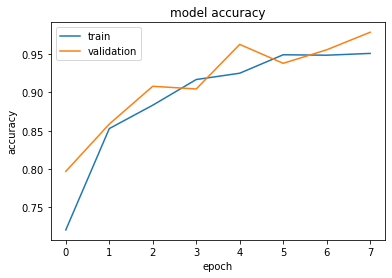

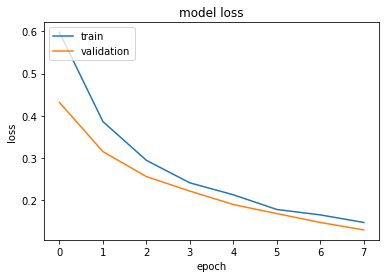

In [6]:
#Plot grafik akurasi dan loss
import matplotlib.pyplot as plt

print(history.history.keys())
#Akurasi
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
#Loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [12]:
import numpy as np
from keras.preprocessing import image
from tensorflow import keras
import os
images = []
img_width, img_height = 224,224
folder_path = 'C:/Users/M Cendekia Airlangga/Dataset/02_Dataset baru/test/normal'
for img in os.listdir(folder_path):
    img = os.path.join(folder_path, img)
    img = image.load_img(img, target_size=(img_width, img_height))
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    images.append(img)

# stack up images list to pass for prediction
images = np.vstack(images)
classes = model.predict(images, batch_size=10)
pred = []
for kelas in classes:
    if kelas[0] >= 0.95:
        pred.append('normal')
    elif kelas[0] < 0.95:
        pred.append('abnormal')
print(pred)
print(pred.count('normal'))
print(pred.count('abnormal'))

['normal', 'normal', 'abnormal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'abnormal', 'normal', 'normal', 'abnormal', 'normal', 'abnormal', 'normal', 'normal', 'abnormal', 'normal', 'abnormal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'abnormal', 'normal', 'normal', 'normal', 'normal', 'abnormal', 'normal', 'normal', 'normal', 'abnormal', 'normal', 'normal', 'normal', 'abnormal', 'normal', 'normal', 'abnormal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'abnormal', 'normal', 'abnormal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'abnormal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', '

In [13]:
import numpy as np
from keras.preprocessing import image
import os
images = []
img_width, img_height = 224,224
folder_path = 'C:/Users/M Cendekia Airlangga/Dataset/02_Dataset baru/test/st abnormal'
for img in os.listdir(folder_path):
    img = os.path.join(folder_path, img)
    img = image.load_img(img, target_size=(img_width, img_height))
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    images.append(img)

# stack up images list to pass for prediction
images = np.vstack(images)
classes = model.predict(images, batch_size=10)
pred1 = []
for kelas in classes:
    if kelas[1] >= 0.95:
        pred1.append('abnormal')
    elif kelas[1] < 0.95:
        pred1.append('normal')
print(pred1)
print(pred1.count('normal'))
print(pred1.count('abnormal'))

['abnormal', 'abnormal', 'abnormal', 'abnormal', 'abnormal', 'abnormal', 'abnormal', 'abnormal', 'abnormal', 'abnormal', 'abnormal', 'abnormal', 'abnormal', 'abnormal', 'abnormal', 'abnormal', 'abnormal', 'abnormal', 'abnormal', 'abnormal', 'abnormal', 'abnormal', 'abnormal', 'abnormal', 'abnormal', 'abnormal', 'abnormal', 'abnormal', 'abnormal', 'abnormal', 'abnormal', 'abnormal', 'abnormal', 'abnormal', 'abnormal', 'abnormal', 'abnormal', 'abnormal', 'abnormal', 'abnormal', 'abnormal', 'abnormal', 'abnormal', 'abnormal', 'abnormal', 'abnormal', 'abnormal', 'abnormal', 'abnormal', 'abnormal', 'abnormal', 'abnormal', 'abnormal', 'abnormal', 'abnormal', 'abnormal', 'abnormal', 'abnormal', 'abnormal', 'abnormal', 'abnormal', 'abnormal', 'abnormal', 'abnormal', 'abnormal', 'abnormal', 'abnormal', 'abnormal', 'abnormal', 'abnormal', 'abnormal', 'abnormal', 'abnormal', 'abnormal', 'abnormal', 'abnormal', 'abnormal', 'abnormal', 'abnormal', 'abnormal', 'abnormal', 'abnormal', 'abnormal', 'ab

In [7]:
model.save('D:/Kuliah/PKM/PKM Jantung/Model/200 epochs/VGG16_dropout0.2_lr5e-6_tf22.h5')

In [37]:
import numpy as np
from keras.preprocessing import image

img_width, img_height = 224, 224
img = image.load_img('C:/Users/M Cendekia Airlangga/Pictures/Coba-Angga2.png', target_size = (img_width, img_height))
img = image.img_to_array(img)
img = np.expand_dims(img, axis = 0)

model.predict(img)

array([[9.9998474e-01, 1.5204868e-05]], dtype=float32)

In [2]:
import tensorflow as tf
new_model= tf.keras.models.load_model(filepath="D:/Kuliah/PKM/PKM Jantung/Model/200 epochs/VGG16_dropout0.2_lr5e-6.h5")

In [3]:
#Converting To TFLite
tflite_converter = tf.lite.TFLiteConverter.from_keras_model(new_model)
tflite_model = tflite_converter.convert()
open("tf_lite_model_tf2.5.tflite", "wb").write(tflite_model)

INFO:tensorflow:Assets written to: C:\Users\MCENDE~1\AppData\Local\Temp\tmpi3way297\assets


110255304

In [12]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import image

# Load TFLite model and allocate tensors.
interpreter = tf.lite.Interpreter(model_path="C:/Users/M Cendekia Airlangga/tf_lite_model_tf2.5.tflite")
interpreter.allocate_tensors()

# Get input and output tensors.
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

#Convert Input Image to Array 
img_width, img_height = 224, 224
img = image.load_img('C:/Users/M Cendekia Airlangga/Pictures/Coba-Angga2.png', target_size = (img_width, img_height))
img = image.img_to_array(img)
img = np.expand_dims(img, axis = 0)

# Test model on input data. 
input_shape = input_details[0]['shape']
input_data = np.array(img) 
interpreter.set_tensor(input_details[0]['index'], input_data)

interpreter.invoke()

# The function `get_tensor()` returns a copy of the tensor data.
# Use `tensor()` in order to get a pointer to the tensor.
# index 0 normal, index 1 abnormal
output_data = interpreter.get_tensor(output_details[0]['index'])
print(output_data)

[[9.99984741e-01 1.52290295e-05]]
